# Problem Setting: Maze Solving

This notebook demonstrates a simple maze solving algorithm based on Deep Q-Learning. According to the Reinforcement learning theory, the Q-Learning algorithm allow the agent to search the goal in 2D maze map. The agent can search and learn by the reward values in each point.

In relation to reinforcement learning theory, the state of agent is 2D position coordinates and the action is to dicide the direction of movement. Within the wall, the agent is movable in a cross direction and can advance by one point at a time. After moving into a new position, the agent can obtain a reward. On greedy searching, this extrinsically motivated agent performs in order to obtain some reward as high as possible. Each reward value is plot in map.

The map data that agent will observe is as follow.

$$\boldsymbol{M}_{reward} =
\begin{pmatrix}
r_{1,1} & \cdots & r_{1,j} & \cdots & r_{1,m} \\
\vdots & \ddots &        &        & \vdots \\
r_{i,1} &        & r_{i,j} & \cdots & r_{i,m} \\
\vdots &        &        & \ddots & \vdots \\
r_{n,1} & \cdots & r_{n,j} & \cdots & r_{n,m}
\end{pmatrix}
$$

where $(i, j)$ is tuple of 2D position coordinates in the maze map. Then $r_{i,j}$ is reward value that the agent can get by arriving the point: $(i, j)$. This notebook defines the reward function as follows

$$r_{i, j} = 1.0 - \sqrt{(i - G_i)^2 + (j - G_j)^2} - \mathcal{P}_{repeating}$$

where $(G_i, G_j)$ is the tuple of goal point and $\mathcal{P}_{repeating}$ is a penalty point in the case that the agent will revisit points that the agent have already reached. If the agent reaches the goal, the reward is $1.0$. This will be maximum reward.

The state of agent is $s_{i,j}$. In this case, the form of agent's state transition matrix is designed to correspond with $\boldsymbol{M}_{reward}$ as follow.

$$\boldsymbol{M}_{state} =
\begin{pmatrix}
s_{1,1} & \cdots & s_{1,j} & \cdots & s_{1,m} \\
\vdots & \ddots &        &        & \vdots \\
s_{i,1} &        & s_{i,j} & \cdots & s_{i,m} \\
\vdots &        &        & \ddots & \vdots \\
s_{n,1} & \cdots & s_{n,j} & \cdots & s_{n,m}
\end{pmatrix}
$$

The possible actions of agent can be limited by $s_{i,j}$. Agent can select adjacent elements in $\boldsymbol{M}_{state}$.

So in this problem setting, the maze map data can be as generated below in detail.

## Problem solution: Q-Learning algorithm.

This notebook considers problem setteing in which an agent interacts with an environment $\mathcal{E}$, in this case the Maze solving, in a sequence of actions, observations and rewards. At each time-step the agent selects an action at from the set of legal game actions, 

$$\boldsymbol{M}_{action} =
\begin{pmatrix}
a_{1,1} & \cdots & a_{1,j} & \cdots & a_{1,m} \\
\vdots & \ddots &        &        & \vdots \\
a_{i,1} &        & a_{i,j} & \cdots & a_{i,m} \\
\vdots &        &        & \ddots & \vdots \\
a_{n,1} & \cdots & a_{n,j} & \cdots & a_{n,m}
\end{pmatrix}
$$.

$\boldsymbol{M}_{state}$, $\boldsymbol{M}_{action}$, and $\boldsymbol{M}_{reward}$ can be assembled as a matrix of rank-3 of 3 channels and considered as a feature points which will be observed by the agent. The state/action-value function is as follows

$$Q(s, a) = Q(\boldsymbol{M}_{state}, \boldsymbol{M}_{action}, \boldsymbol{M}_{reward})$$

The goal of the agent is to interact with the Maze map by selecting actions in a way that maximises future rewards. We can make the standard assumption that future rewards are discounted by a factor of $\gamma$ per time-step, and define the future discounted return at time $t$ as $R_t = \sum_{t'=t}^{T}\gamma^{t'-t}r_{t'}$
, where $T$ is the time-step at which the agent will reach the goal. This notebook defines the optimal state/action-value function $Q^{\ast}(s, a) = Q^{\ast}(\boldsymbol{M}_{state}, \boldsymbol{M}_{action}, \boldsymbol{M}_{reward})$ as the maximum expected return achievable by following any strategy, after seeing some state $s$ and then taking some action $a$, $Q^{\ast}(s, a) = \max \pi \mathbb{E}[R_t \mid s_t = s, a_t = a, \pi ]$, where $\pi$ is a policy mapping sequences to actions (or distributions over actions).

The optimal state/action-value function obeys an important identity known as the Bellman equation. This is based on the following *intuition*: if the optimal value $Q^{\ast}(s', a')$ of the sequence $s'$ at the next time-step was known for all possible actions $a'$ , then the optimal strategy is to select the action $a'$ maximising the expected value of $r + \gamma Q^{\ast}(s', a')$, 

$$Q^{\ast}(s', a') = \mathbb{E}_{s' \sim \mathcal{E}}[r + \gamma \max_{a'} Q^{\ast}(s', a')\mid s, a]$$

The basic idea behind many reinforcement learning algorithms is to estimate the state/action-value function, by using the Bellman equation as an iterative update,

$$Q_{i+1}(s, a) = \mathbb{E}[r + \gamma \max_{a'}Q_i(s', a') \mid s, a]$$.

Such *value iteration algorithms* converge to the optimal state/action-value function, $Q_i \rightarrow Q^{\ast}$ as $i \rightarrow \infty$. In practice, this basic approach is totally impractical, because the state/action-value function is estimated separately for each sequence, without any **generalisation**. Instead, it is common to use a **function approximator** to estimate the state/action-value function,

$$Q(s, a; \theta) \approx Q^{\ast}(s, a)$$

# Problem re-setting: Generalisation, or a function approximation.

The Reinforcement learning theory presents several issues from a perspective of deep learning theory. Firstly, deep learning applications have required large amounts of handlabelled training data. Reinforcement learning algorithms, on the other hand, must be able to learn from a scalar reward signal that is frequently sparse, noisy and delayed.

The difference between the two theories is not only the type of data but also the timing to be observed. The delay between taking actions and receiving rewards, which can be thousands of timesteps long, seems particularly daunting when compared to the direct association between inputs and targets found in supervised learning. 

Another issue is that most deep learning algorithms assume the data samples to be independent, while in reinforcement learning one typically encounters sequences of highly correlated states. Furthermore, in Reinforcement learning the data distribution changes as the algorithm learns new behaviours, which can be problematic for deep learning methods that assume a fixed underlying distribution.

## Problem solution: Deep Q-Network.

In this problem setting, the function of nerual network or deep learning is a function approximation with weights $\theta$ as a Q-Network. A Q-Network can be trained by minimising a loss functions $L_i(\theta_i)$ that changes at each iteration $i$,

$$L_i(\theta_i) = \mathbb{E}_{s, a \sim \rho(\cdot)}[y_i - Q(s, a, \theta_i)]^2$$

where $y_i = \mathbb{E}_{s' \sim \mathcal{E}}[r + \gamma \max_{a'} Q(s', a', \theta_{i-1}) \mid s, a]$ is the target for iteration $i$ and $\rho(\cdot)$ is a so-called behaviour distribution. This is probability distribution over states and actions. The parameters from the previous iteration $\theta_{i−1}$ are held fixed when optimising the loss function $L_i(\theta_i)$. Differentiating the loss function
with respect to the weights we arrive at the following gradient,

$$\nabla_{\theta_i}L_i(\theta_i) = \mathbb{E}_{s, a \sim \rho(\cdot);s' \sim \mathcal{E}}\left[\left(r + \gamma \max_{a'} Q(s', a'; \theta_{i-1}) - Q(s, a; \theta_i)\right)\nabla_{\theta_i}Q(s, a; \theta)\right]$$.

Because of computational complexity with high rank matrix: $Q(s, a) = Q(\boldsymbol{M}_{state}, \boldsymbol{M}_{action}, \boldsymbol{M}_{reward})$, this notebook adopts a **Deep convolutional neural networks(Deep CNNs)** and implements with library: [accel-brain-base](https://github.com/accel-brain/accel-brain-code/tree/master/Accel-Brain-Base) which is Python library for building the CNNs.

To simplify expression, the output from the Deep CNNs as a function approximator is an affine transformation is as follows

$$y'_i = F_{activate}\left((\boldsymbol{M}_{state}, \boldsymbol{M}_{action}, \boldsymbol{M}_{reward}) \ast W_{\theta_{i}} + \vec{b}\right)$$

where $\ast$ is a convolution operator. $W_{\theta_{i}}$ is weight matrix in CNNs and $\vec{b}$ is a bias vector. And $F_{activate}$ is an activation function such as Logistic function, Tanh function, or ReLu function.

### Import modules and instantiate objects.

Import Python modules from [accel-brain-base](https://github.com/accel-brain/accel-brain-code/tree/master/Accel-Brain-Base) and [pyqlearning](https://github.com/accel-brain/accel-brain-code/tree/master/Reinforcement-Learning) and instantiate objects.

In [1]:
from pyqlearning.samplabledata.policysampler._mxnet.maze_policy import MazePolicy
from accelbrainbase.computableloss._mxnet.l2_norm_loss import L2NormLoss
from accelbrainbase.controllablemodel._mxnet.dqlcontroller.dqn_controller import DQNController
from accelbrainbase.observabledata._mxnet.functionapproximator.function_approximator import FunctionApproximator
from accelbrainbase.noiseabledata._mxnet.gauss_noise import GaussNoise
from accelbrainbase.observabledata._mxnet.neural_networks import NeuralNetworks
from accelbrainbase.observabledata._mxnet.convolutional_neural_networks import ConvolutionalNeuralNetworks
from accelbrainbase.observabledata._mxnet.convolutionalneuralnetworks.mobilenet_v2 import MobileNetV2

In [2]:
import numpy as np
import mxnet as mx
import mxnet.ndarray as nd
import mxnet as mx
import mxnet.ndarray as nd
import numpy as np
import pandas as pd
from mxnet.gluon.nn import Conv2D
from mxnet.gluon.nn import BatchNorm
from mxnet import MXNetError
from logging import getLogger

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("accelbrainbase")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

In [4]:
policy_sampler = MazePolicy(
    batch_size=25,
    map_size=(20, 20), 
    moving_max_dist=3,
    memory_num=8,
    possible_n=5,
    repeating_penalty=0.5,
    ctx=mx.gpu(),
)

### Setup hyperparameters.

In relation to our problem setting, the function of `DQNController` is to solve Maze problem with Deep Q-Network. This object can be delegated `FunctionApproximator` and received hyperparameters.

In [5]:
computable_loss = L2NormLoss()
ctx = mx.gpu()

output_nn = NeuralNetworks(
    # is-a `ComputableLoss` or `mxnet.gluon.loss`.
    computable_loss=computable_loss,
    # `list` of int` of the number of units in hidden/output layers.
    units_list=[1],
    # `list` of act_type` in `mxnet.ndarray.Activation` or `mxnet.symbol.Activation` in input gate.
    activation_list=["sigmoid"],
    # `list` of `float` of dropout rate.
    dropout_rate_list=[0.0],
    # `list` of `mxnet.gluon.nn.BatchNorm`.
    hidden_batch_norm_list=[None],
    # `bool` for using bias or not in output layer(last hidden layer).
    output_no_bias_flag=True,
    # `bool` for using bias or not in all layer.
    all_no_bias_flag=True,
    # Call `mxnet.gluon.HybridBlock.hybridize()` or not.
    hybridize_flag=True,
    # `mx.gpu()` or `mx.cpu()`.
    ctx=ctx,
)

cnn = MobileNetV2(
    # is-a `ComputableLoss` or `mxnet.gluon.loss`.
    computable_loss=computable_loss,
    # is-a `mxnet.initializer.Initializer` for parameters of model. If `None`, it is drawing from the Xavier distribution.
    initializer=None,
    # `int` of the number of filters in input lauer.
    input_filter_n=32,
    # `tuple` or `int` of kernel size in input layer.
    input_kernel_size=(3, 3),
    # `tuple` or `int` of strides in input layer.
    input_strides=(1, 1),
    # `tuple` or `int` of zero-padding in input layer.
    input_padding=(1, 1),
    # `list` of information of bottleneck layers whose `dict` means ...
    # - `filter_rate`: `float` of filter expfilter.
    # - `filter_n`: `int` of the number of filters.
    # - `block_n`: `int` of the number of blocks.
    # - `stride`: `int` or `tuple` of strides.
    bottleneck_dict_list=[
        {
            "filter_rate": 1,
            "filter_n": 32,
            "block_n": 1,
            "stride": 1
        },
        {
            "filter_rate": 1,
            "filter_n": 32,
            "block_n": 2,
            "stride": 1
        },
    ],
    # `int` of the number of filters in hidden layers.
    hidden_filter_n=64,
    # `tuple` or `int` of pooling size in hidden layer.
    # If `None`, the pooling layer will not attatched in hidden layer.
    pool_size=None,
    # is-a `NeuralNetworks` or `mxnet.gluon.block.hybridblock.HybridBlock`.
    output_nn=output_nn,
    # `str` of name of optimizer.
    optimizer_name="sgd",
    # Call `mxnet.gluon.HybridBlock.hybridize()` or not.
    hybridize_flag=True,
    # `mx.gpu()` or `mx.cpu()`.
    ctx=ctx,
)

function_approximator = FunctionApproximator(
    model=cnn, 
    initializer=None,
    hybridize_flag=True,
    scale=1.0, 
    ctx=ctx, 
)

DQN = DQNController(
    function_approximator=function_approximator,
    policy_sampler=policy_sampler,
    computable_loss=L2NormLoss(),
    optimizer_name="SGD",
    learning_rate=1e-06,
    hybridize_flag=True,
    scale=1.0,
    ctx=ctx,
    initializer=None,
    recursive_learning_flag=False,
)
DQN.alpha_value = 0.3


### Visualize map.

Before executing `DQNController.lean()`, `MazePolicy` created a map at random and has `np.ndarray` of the data as `MazePolicy.map_arr`.

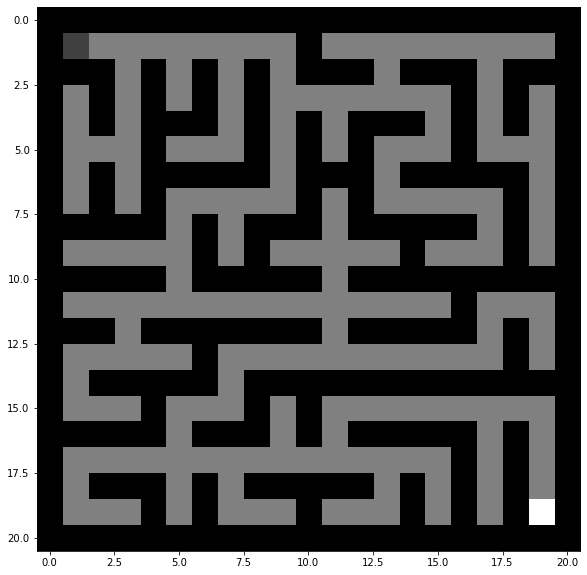

In [6]:
_ = plt.figure(figsize=(10, 10))
plt.imshow(DQN.policy_sampler.map_arr, cmap="gray")
plt.tick_params(labelbottom="off",bottom="off")
plt.tick_params(labelleft="off",left="off")
plt.show()
plt.close()

- Black squares represent a wall.
- Light gray squares represent passages.
- A dark gray square represents a start point.
- A white squeare represents a goal point.

### Schedule the learning.

Determine the number of learning and the number of searches.

In [7]:
# Execute learning.
DQN.learn(
    # The number of searching.
    iter_n=500,
)

----------------------------------------------------------------------------------------------------
Iter: 1
Reward value(mean): 0.72168726
Predicted Q-value(mean): 0.3228165
Real Q-value(mean): 0.30044883
Loss of Q-Value(mean): 3.3106699e-07
----------------------------------------------------------------------------------------------------
Iter: 2
Reward value(mean): 0.72737074
Predicted Q-value(mean): 0.35185394
Real Q-value(mean): 0.29695767
Loss of Q-Value(mean): 1.4602917e-05
----------------------------------------------------------------------------------------------------
Iter: 3
Reward value(mean): 0.7274797
Predicted Q-value(mean): 0.35046464
Real Q-value(mean): 0.2918044
Loss of Q-Value(mean): 1.7120048e-05
----------------------------------------------------------------------------------------------------
Iter: 4
Reward value(mean): 0.7276944
Predicted Q-value(mean): 0.35259783
Real Q-value(mean): 0.28627583
Loss of Q-Value(mean): 2.7223687e-05
----------------------------

Real Q-value(mean): 0.27100727
Loss of Q-Value(mean): 4.1797568e-05
----------------------------------------------------------------------------------------------------
Iter: 35
Reward value(mean): 0.72679764
Predicted Q-value(mean): 0.34692773
Real Q-value(mean): 0.26990673
Loss of Q-Value(mean): 4.2021813e-05
----------------------------------------------------------------------------------------------------
Iter: 36
Reward value(mean): 0.72756445
Predicted Q-value(mean): 0.35093272
Real Q-value(mean): 0.270275
Loss of Q-Value(mean): 4.9644666e-05
----------------------------------------------------------------------------------------------------
Iter: 37
Reward value(mean): 0.7267267
Predicted Q-value(mean): 0.32993987
Real Q-value(mean): 0.27075517
Loss of Q-Value(mean): 1.8748635e-05
----------------------------------------------------------------------------------------------------
Iter: 38
Reward value(mean): 0.7280676
Predicted Q-value(mean): 0.34462652
Real Q-value(mean): 0.27

Iter: 68
Reward value(mean): 0.7268579
Predicted Q-value(mean): 0.34763545
Real Q-value(mean): 0.27010384
Loss of Q-Value(mean): 4.7256493e-05
----------------------------------------------------------------------------------------------------
Iter: 69
Reward value(mean): 0.7274717
Predicted Q-value(mean): 0.34939992
Real Q-value(mean): 0.27032122
Loss of Q-Value(mean): 4.2302752e-05
----------------------------------------------------------------------------------------------------
Iter: 70
Reward value(mean): 0.7275699
Predicted Q-value(mean): 0.34575057
Real Q-value(mean): 0.27063686
Loss of Q-Value(mean): 3.9785336e-05
----------------------------------------------------------------------------------------------------
Iter: 71
Reward value(mean): 0.72802806
Predicted Q-value(mean): 0.34853604
Real Q-value(mean): 0.27046788
Loss of Q-Value(mean): 4.513056e-05
----------------------------------------------------------------------------------------------------
Iter: 72
Reward value(me

Iter: 300
Reward value(mean): 0.7280766
Predicted Q-value(mean): 0.34774455
Real Q-value(mean): 0.27125397
Loss of Q-Value(mean): 3.864362e-05


Keyboard Interrupt.


### Visualize learning logs.

Check the difference between inferneced Q-Values and real observed Q-Values.

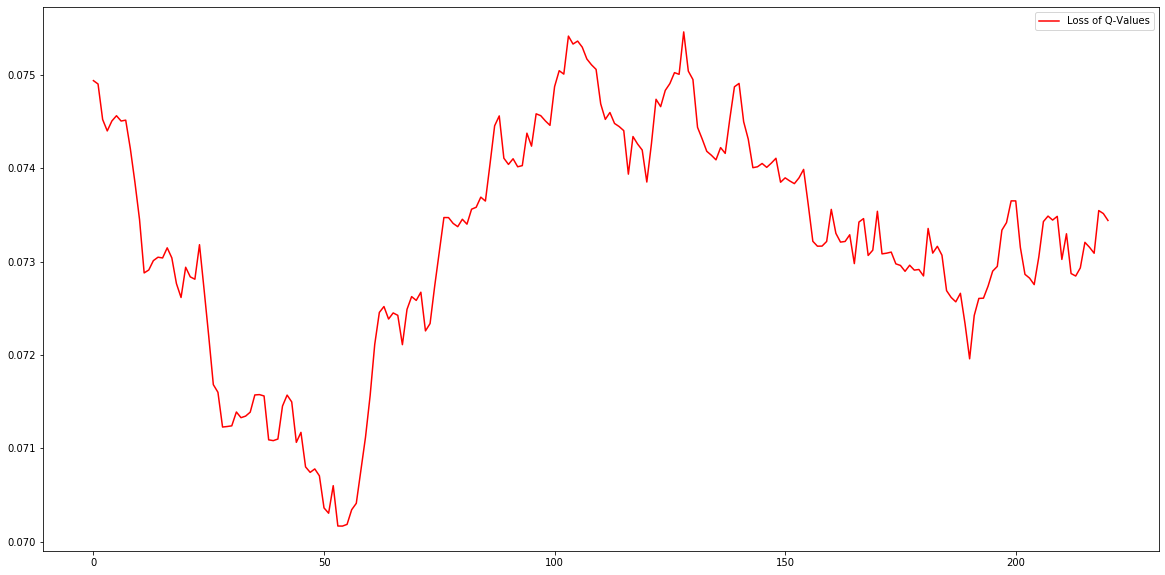

In [9]:
def moving_avg(arr, window=50):
    return np.convolve(arr, np.ones(window) / window, mode='same')[window:-window]

plt.figure(figsize=(20, 10))
plt.plot(moving_avg(np.abs(DQN.q_logs_arr[:, 0] - DQN.q_logs_arr[:, 1])), label="Loss of Q-Values", color="red")
plt.legend()
plt.show()
plt.close()

### Inference the routes.

After learning, `DQN` can provide a method `inference` for infernecing the routes.

In [10]:
# Reset Epsilon greedy rate.
DQN.epsilon_greedy_rate = 0.9
DQN.policy_sampler.inferencing_mode = True
DQN.policy_sampler.reset_agent_pos()

# Inference the routes.
state_arr_list, q_value_arr_list = DQN.inference(
    iter_n=500
)

In [11]:
result_df_list = []
for i in range(len(state_arr_list)):
    arr_tuple = np.where(state_arr_list[i][0][0].asnumpy() == 1)

    x = arr_tuple[0][0]
    y = arr_tuple[1][0]
    
    q_value = q_value_arr_list[i].asnumpy()[0][0]
    result_df_list.append((x, y, q_value))
result_df = pd.DataFrame(result_df_list, columns=["x", "y", "q_value"])

In [13]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

font = ImageFont.truetype("<path to your font>", 16)

img_list = []

for i in range(result_df.shape[0]):
    x = result_df.x.values[i]
    y = result_df.y.values[i]
    q = result_df.q_value.values[i]

    now_map_arr = DQN.policy_sampler.map_arr.copy()
    now_map_arr[x, y] = 2
    now_map_arr = 255 * (now_map_arr - now_map_arr.min()) / (now_map_arr.max() - now_map_arr.min())
    img = Image.fromarray(np.uint8(now_map_arr))
    img = img.resize((400, 400))

    bg_img = Image.new("RGB", (420, 420), (0, 0, 0))
    bg_img.paste(img, (10, 10))
    draw = ImageDraw.Draw(bg_img)
    draw.multiline_text((5, 5), 'Inferenced Q-Value: ' + str(q), fill=(255, 255, 255), font=font)
    img_list.append(bg_img)

img_list[0].save(
    'img/DQN_agent_demo.gif',
    save_all=True,
    append_images=img_list[1:], 
    optimize=False, 
    duration=40, 
    loop=0
)


<img src='img/DQN_agent_demo_default.gif?1'>

# References

- Gupta, J. K., Egorov, M., & Kochenderfer, M. (2017, May). Cooperative multi-agent control using deep reinforcement learning. In International Conference on Autonomous Agents and Multiagent Systems (pp. 66-83). Springer, Cham.
- Mnih, V., Kavukcuoglu, K., Silver, D., Graves, A., Antonoglou, I., Wierstra, D., & Riedmiller, M. (2013). Playing atari with deep reinforcement learning. arXiv preprint arXiv:1312.5602.